In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
(df.isna().sum().sort_values(ascending=False)/len(df.index))*100

DurationOfPitch             5.135025
MonthlyIncome               4.766776
Age                         4.623568
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
TypeofContact               0.511457
Designation                 0.000000
OwnCar                      0.000000
PitchSatisfactionScore      0.000000
Passport                    0.000000
CustomerID                  0.000000
MaritalStatus               0.000000
ProdTaken                   0.000000
NumberOfPersonVisiting      0.000000
Gender                      0.000000
Occupation                  0.000000
CityTier                    0.000000
ProductPitched              0.000000
dtype: float64

In [6]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [7]:
df['Gender']=df['Gender'].str.replace("Fe Male", "Female")

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
## dealing with missing values

In [10]:
df['Age'].median()

36.0

In [11]:
df.Age.fillna(df['Age'].median(), inplace=True)
df.Age.isna().sum()

0

In [12]:
df.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [13]:
df.TypeofContact.isna().sum() #very less percent of data >> prefer droping them

25

In [14]:
df.dropna(subset=['TypeofContact'], inplace=True)

In [15]:
df.TypeofContact.shape
df.shape

(4863, 20)

In [16]:
df.dropna(subset=['NumberOfChildrenVisiting','NumberOfFollowups','PreferredPropertyStar'],inplace=True)

In [17]:
df.shape

(4726, 20)

In [18]:
df.fillna(df['DurationOfPitch'].median(), inplace=True)

In [19]:
df.fillna(df['MonthlyIncome'].median(), inplace=True)

In [20]:
df.fillna(df['NumberOfTrips'].median(), inplace=True)

In [21]:
df.shape

(4726, 20)

In [22]:
#checking for duplicate records
df[df.duplicated()]

#no duplicate record found

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [24]:
## seperating the catagorical and non catagorical columns

cats=['ProdTaken', 'TypeofContact','CityTier','Gender','ProductPitched','PreferredPropertyStar','MaritalStatus',
      'Designation','Passport','Occupation','OwnCar','PitchSatisfactionScore']

numeric=['CustomerID','Age','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting'
         ,'MonthlyIncome']

In [25]:
cats

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Gender',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Designation',
 'Passport',
 'Occupation',
 'OwnCar',
 'PitchSatisfactionScore']

In [36]:
numeric

['CustomerID',
 'Age',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

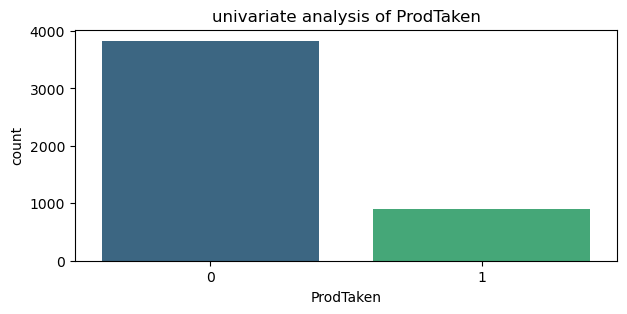

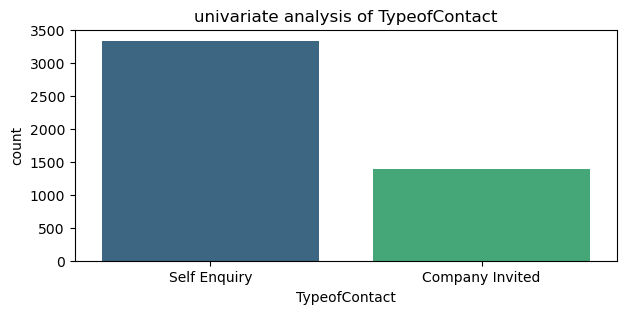

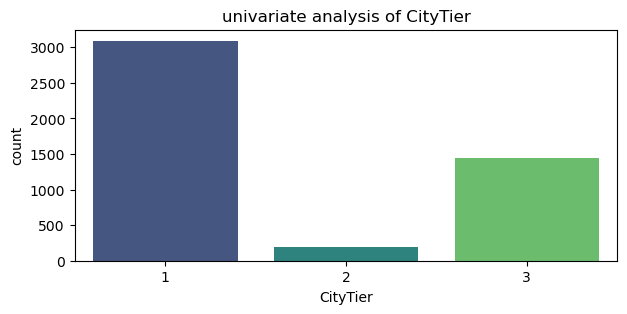

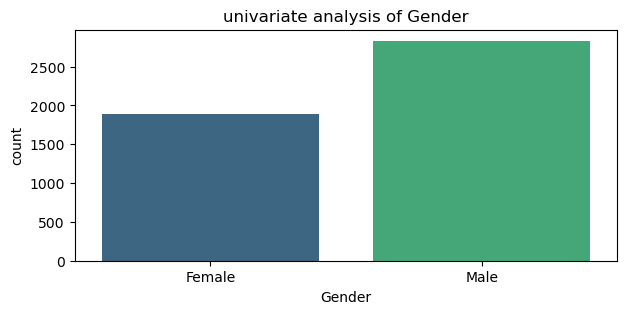

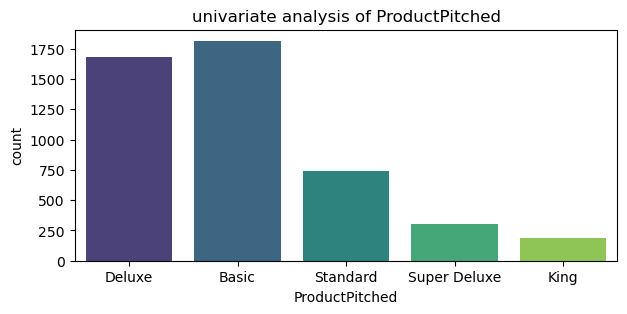

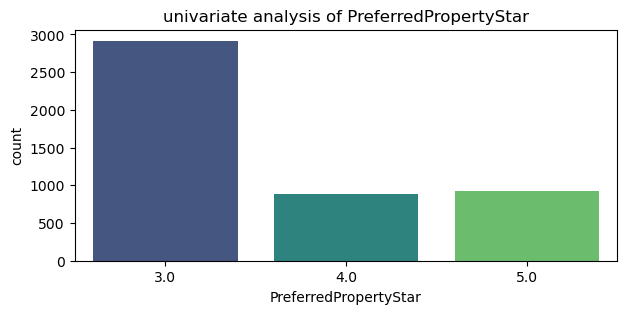

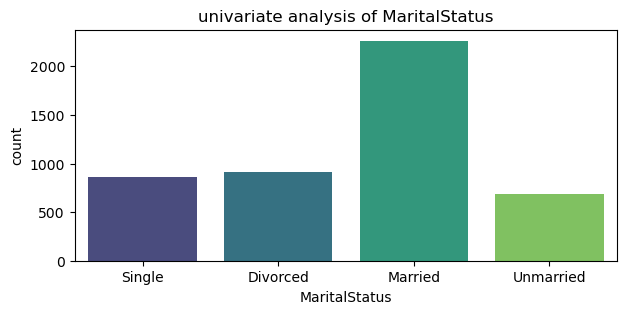

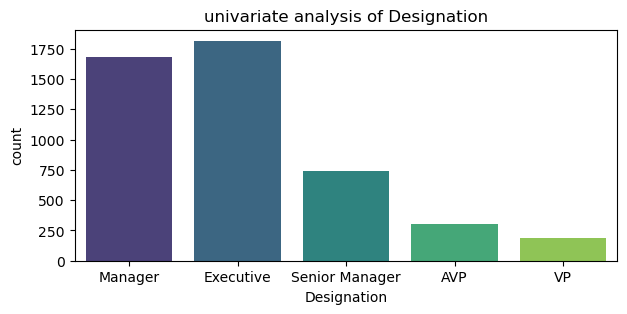

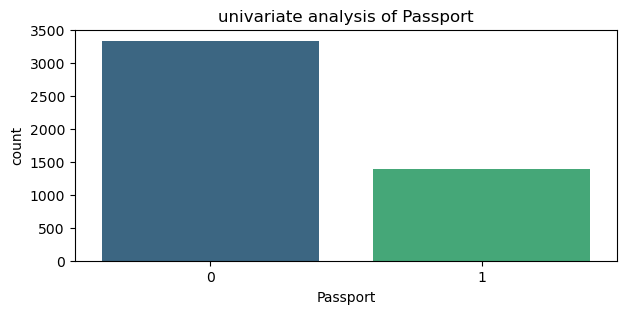

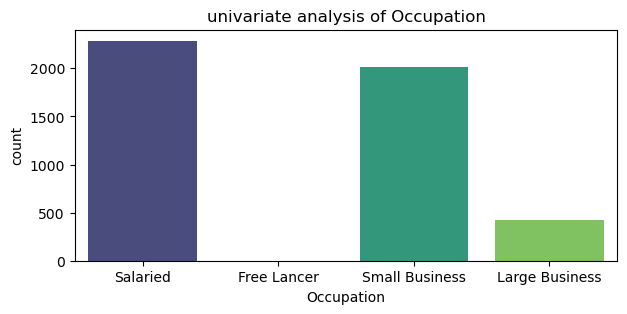

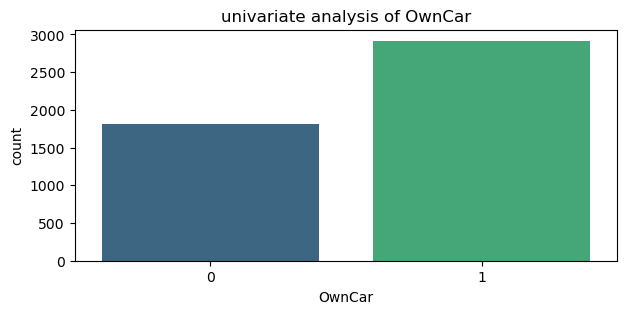

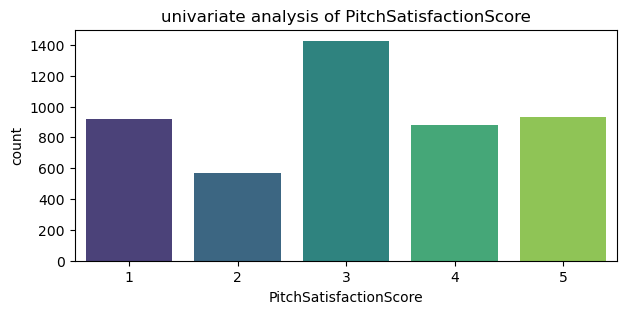

In [27]:
## visualisation of catagorical column

for cat_items in cats:
    plt.figure(figsize=(7,3))
    sns.countplot(x = cat_items, data =df, palette='viridis')
    plt.title(f'univariate analysis of {cat_items}')
    plt.show()
    

In [28]:
## insights 

#>>self enquired contacts have higher ratio than company invited
#>>people visiting tier one city are most followed by tier 3 city and then tier 2 city
#>>population of Male travellers are more than Female travellers
#>>basic product pitched has the maximum quantity followed by deluxe,standard ,super deluxe and king
#>>3 star property has most visit 
#>>people who are married are most likely to travel
#>>majority of people are not carring their passport
#>>salaried and small buisness ownwed people are most likely to travel
#>>majority of the people travelled had their own car

In [29]:
## visualisation of the numeric data

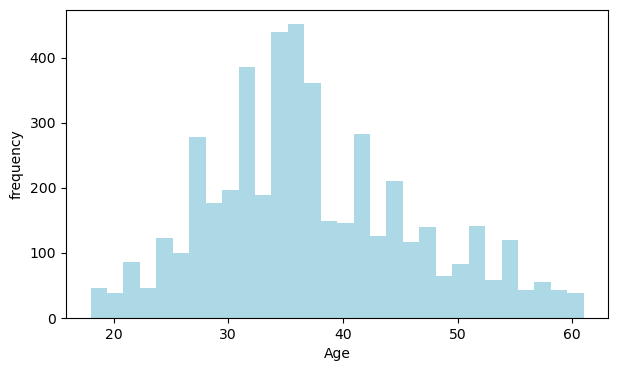

In [30]:
plt.figure(figsize=(7,4))
plt.hist(x='Age', data=df,bins=30,color='lightblue')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

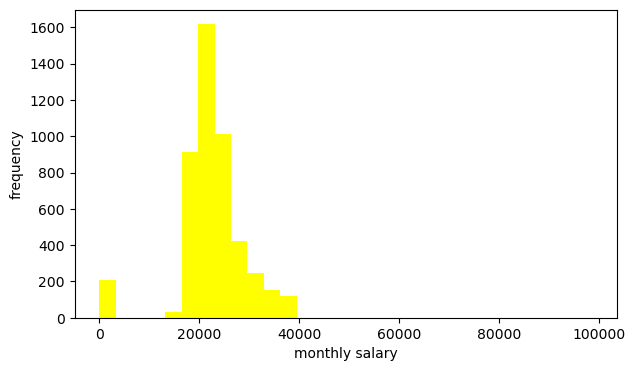

In [35]:
plt.figure(figsize=(7,4))
plt.hist(x='MonthlyIncome',bins=30, data=df,color='yellow')
plt.xlabel('monthly salary')
plt.ylabel('frequency')
plt.show()

In [37]:
numeric

['CustomerID',
 'Age',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

<Axes: xlabel='NumberOfPersonVisiting', ylabel='NumberOfTrips'>

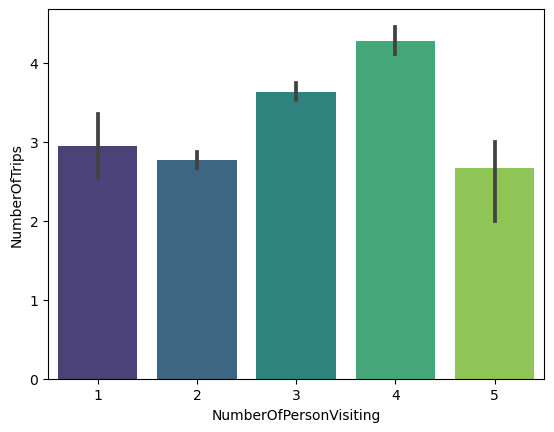

In [39]:
sns.barplot(x= 'NumberOfPersonVisiting',y=  'NumberOfTrips', data=df, palette='viridis')

In [40]:
#insights
#>> majority of the people travelling are aged between 30 to 40
#>> the salary of the people are ranging between 20000 to 40000
#>> people visiting in a group of four are most likely to take more trips

<Axes: >

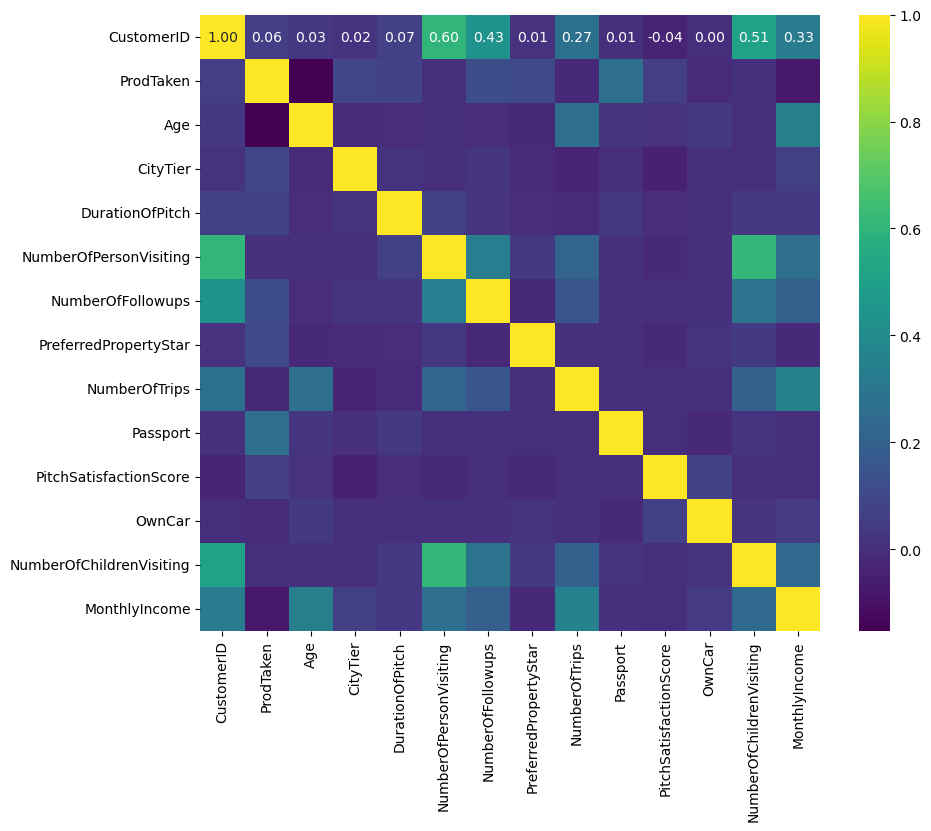

In [64]:
numeric_cols=df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), cmap='viridis' , fmt='.2f',annot=True)
